# 一、位置和材料特征

### 1.导入数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

train_df = pd.read_csv('./input/train.csv', index_col=0)

address_columns = ['SalePrice','MSZoning', 'LotFrontage', 'LotArea', 
                   'Street', 'Alley', 'Neighborhood', 'Condition1', 'Condition2']
material_columns = ['SalePrice','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                   'MasVnrArea','ExterQual','ExterCond','LotShape','LandContour']


### 缺失值分布

In [13]:
# MSZoning
# MasVnrType
# Exterior1st
# Exterior2nd
material_df.groupby('Exterior2nd').size()


# df.loc[df['MSZoning'].isnull(),'MSZoning'] ='RL'
# df.loc[df['MasVnrType'].isnull(),'MasVnrType'] ='None'
# df.loc[df['Exterior1st'].isnull(),'Exterior1st'] ='VinylSd'
# df.loc[df['Exterior2nd'].isnull(),'Exterior2nd'] ='VinylSd'


# MSZoning
# C (all)      10
# FV           65
# RH           16
# RL         1151
# RM          218

# MasVnrType
# BrkCmn      15
# BrkFace    445
# None       864
# Stone      128

# Exterior1st
# AsbShng     20
# AsphShn      1
# BrkComm      2
# BrkFace     50
# CBlock       1
# CemntBd     61
# HdBoard    222
# ImStucc      1
# MetalSd    220
# Plywood    108
# Stone        2
# Stucco      25
# VinylSd    515
# Wd Sdng    206
# WdShing     26

# Exterior2nd
# AsbShng     20
# AsphShn      3
# Brk Cmn      7
# BrkFace     25
# CBlock       1
# CmentBd     60
# HdBoard    207
# ImStucc     10
# MetalSd    214
# Other        1
# Plywood    142
# Stone        5
# Stucco      26
# VinylSd    504
# Wd Sdng    197
# Wd Shng     38


Exterior2nd
AsbShng     20
AsphShn      3
Brk Cmn      7
BrkFace     25
CBlock       1
CmentBd     60
HdBoard    207
ImStucc     10
MetalSd    214
Other        1
Plywood    142
Stone        5
Stucco      26
VinylSd    504
Wd Sdng    197
Wd Shng     38
dtype: int64

### 2. 看看预测结果分布好了

- 1.主要集中在8000---30000左右吧，小于8000的还是很少的，超出50000以上的，也是很少
- 2.预测结果到时候可以看一下分布，应该也大致上是同样的规律，如果贵的和便宜的多了，肯定有问题

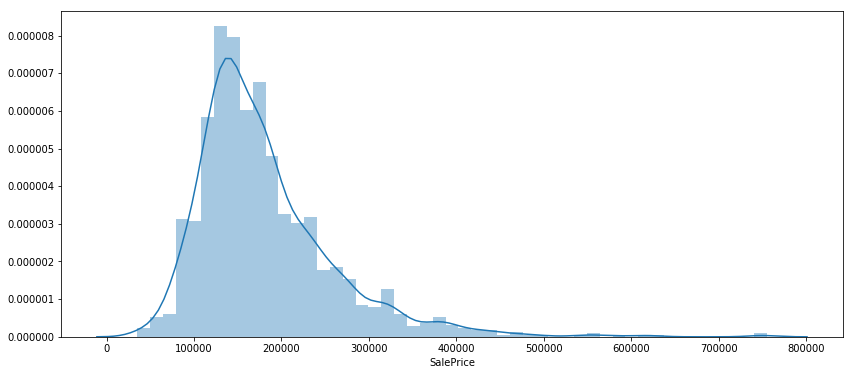

In [2]:
sns.set_context({"figure.figsize": (14, 6)})

x1 = train_df.SalePrice
sns.distplot(x1)

### 3. address类分析

- MSZoning(position): The general zoning classification
- LotFrontage(position): Linear feet of street connected to property
- LotArea(position): Lot size in square feet
- Street(position): Type of road access
- Alley(position): Type of alley access
- Neighborhood（Ames市区的实际位置）: Physical locations within Ames city limits
- Condition1（挨着哪条主路或者铁路）: Proximity to main road or railroad
- Condition2（挨着哪条主路或者铁路）: Proximity to main road or railroad (if a second is present)


In [2]:
address_df = train_df.loc[:, address_columns]
address_df.head()

,SalePrice,MSZoning,LotFrontage,LotArea,Street,Alley,Neighborhood,Condition1,Condition2
Id,,,,,,,,,
1,208500,RL,65.0,8450,Pave,NaN,CollgCr,Norm,Norm
2,181500,RL,80.0,9600,Pave,NaN,Veenker,Feedr,Norm
3,223500,RL,68.0,11250,Pave,NaN,CollgCr,Norm,Norm
4,140000,RL,60.0,9550,Pave,NaN,Crawfor,Norm,Norm
5,250000,RL,84.0,14260,Pave,NaN,NoRidge,Norm,Norm


In [3]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 9 columns):
SalePrice       1460 non-null int64
MSZoning        1460 non-null object
LotFrontage     1201 non-null float64
LotArea         1460 non-null int64
Street          1460 non-null object
Alley           91 non-null object
Neighborhood    1460 non-null object
Condition1      1460 non-null object
Condition2      1460 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 114.1+ KB


### 3-1.位置特征-分析1：
- 1.MSZoning和Street对房价影响差异还是很显著的，比如FV-MSZoning，其实正常，好地段肯定贵啊
- 2.Alley和Street正好相反，样本较少，完了想想怎么搞这个货

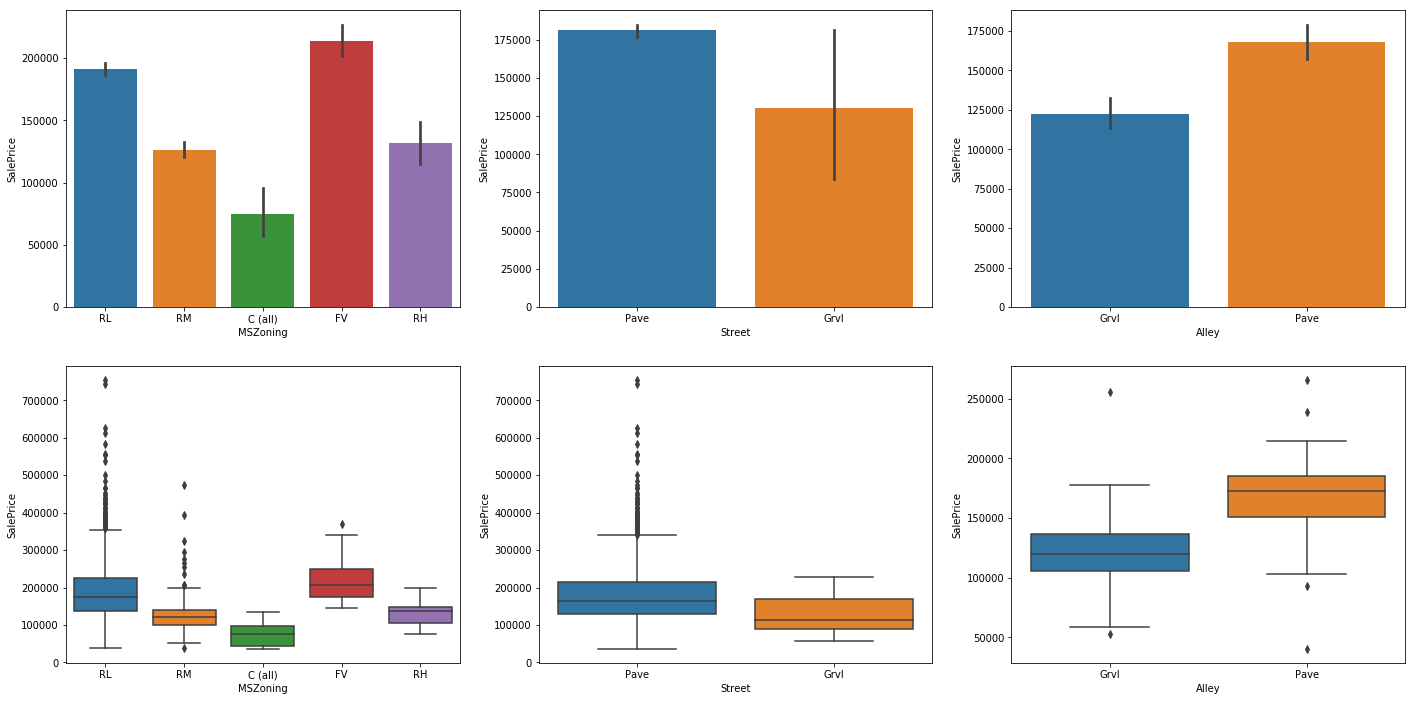

In [5]:
sns.set_context({"figure.figsize": (24, 12)})

plt.subplot2grid((2,3),(0,0))
sns.barplot(x='MSZoning', y='SalePrice', data=address_df)
plt.subplot2grid((2,3),(1,0))
sns.boxplot(x='MSZoning', y='SalePrice', data=address_df)


plt.subplot2grid((2,3),(0,1))
sns.barplot(x='Street', y='SalePrice', data=address_df)
plt.subplot2grid((2,3),(1,1))
sns.boxplot(x='Street', y='SalePrice', data=address_df)


plt.subplot2grid((2,3),(0,2))
sns.barplot(x='Alley', y='SalePrice', data=address_df)
plt.subplot2grid((2,3),(1,2))
sns.boxplot(x='Alley', y='SalePrice', data=address_df)

### 3-2.位置特征-分析2：
- 1.这两个特征名称很相似，内容也很相似，放在一起对比一下
- 2.除了地域导致价格差异以外，像RRNN/PosN这两个数据波动较大，可能和广告宣传或者炒房有关？或者学区房（😂国外应该没有这个）
- 3.必要时这两个特征感觉可以组合处理，到时候求个并集合并一下试试（添加特征）
- 4.Neighborhood这个属性还是能看出来热点和非热点地区，比较明显（特征处理：到时候按价格给它分段好了）
- 5.Condition1-PosA、RRAn、RRAe和房价关系固定，到时候看看这个会怎么样

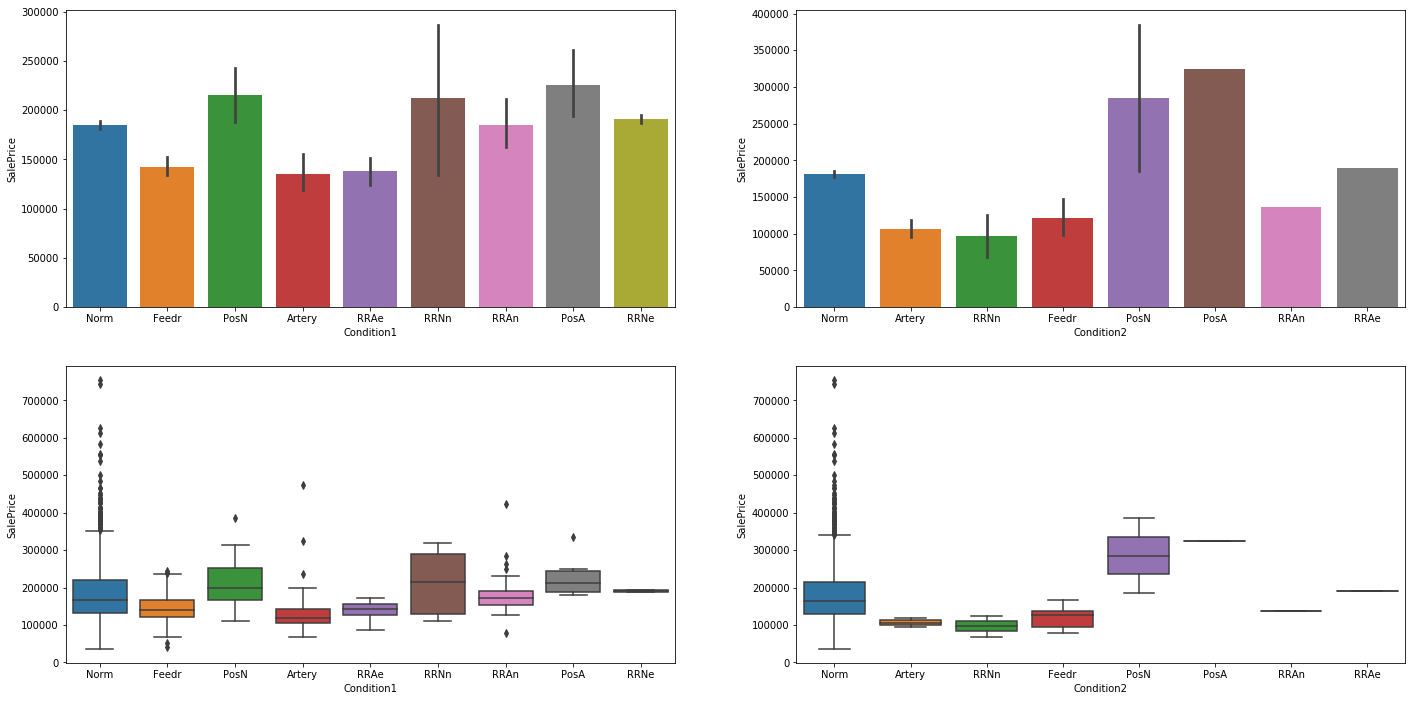

In [6]:
sns.set_context({"figure.figsize": (24, 12)})

plt.subplot2grid((2,2),(0,0))
sns.barplot(x='Condition1', y='SalePrice', data=address_df)
plt.subplot2grid((2,2),(1,0))
sns.boxplot(x='Condition1', y='SalePrice', data=address_df)


plt.subplot2grid((2,2),(0,1))
sns.barplot(x='Condition2', y='SalePrice', data=address_df)
plt.subplot2grid((2,2),(1,1))
sns.boxplot(x='Condition2', y='SalePrice', data=address_df)

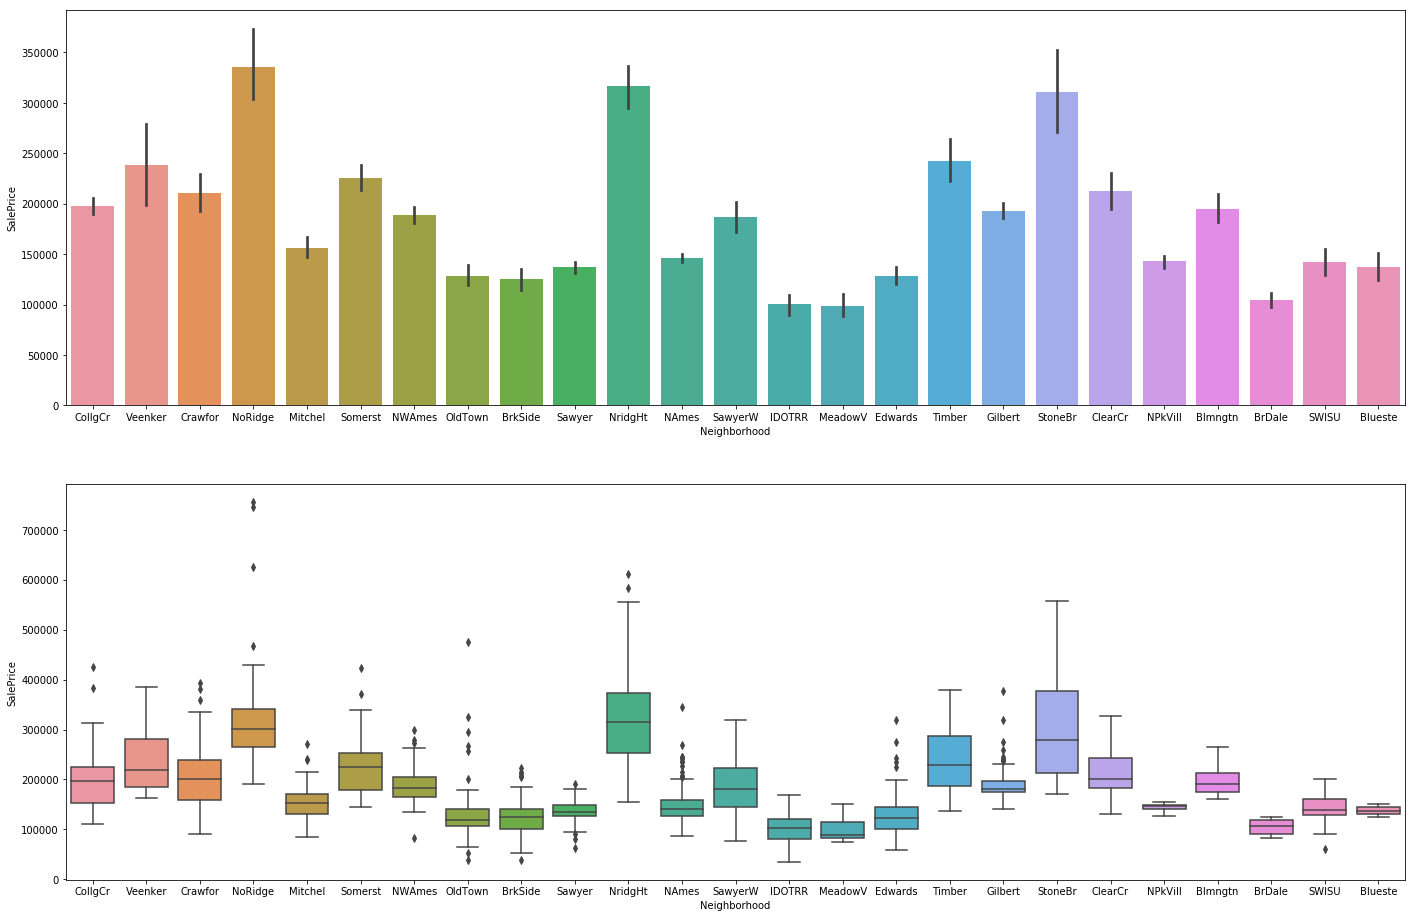

In [7]:
sns.set_context({"figure.figsize": (24, 16)})

plt.subplot2grid((2,1),(0,0))
sns.barplot(x='Neighborhood', y='SalePrice', data=address_df)
plt.subplot2grid((2,1),(1,0))
sns.boxplot(x='Neighborhood', y='SalePrice', data=address_df)

### 3-3.位置特征-分析3：
- 1.散点分布可以看到LotFrontage、LotArea还是比较集中的
- 2.折线图更加明显，看到大致分布区间，处理特征时，大致分为2-3段应该效果不错

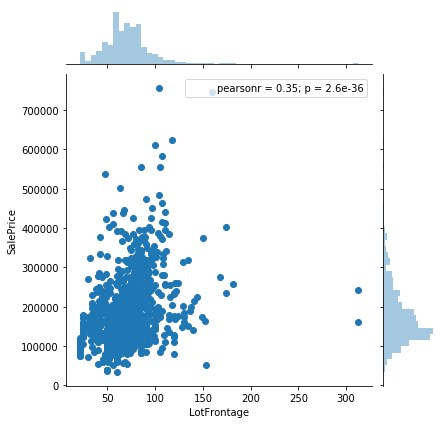

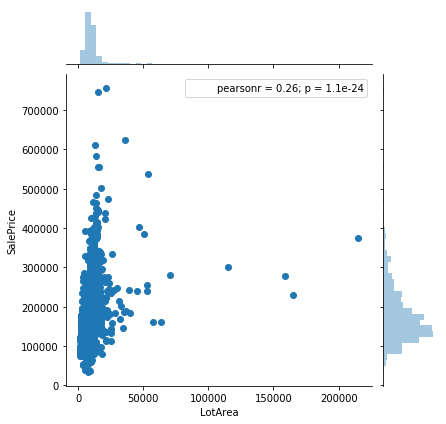

In [8]:
sns.jointplot(x='LotFrontage', y='SalePrice', data=address_df)
sns.jointplot(x='LotArea', y='SalePrice', data=address_df)

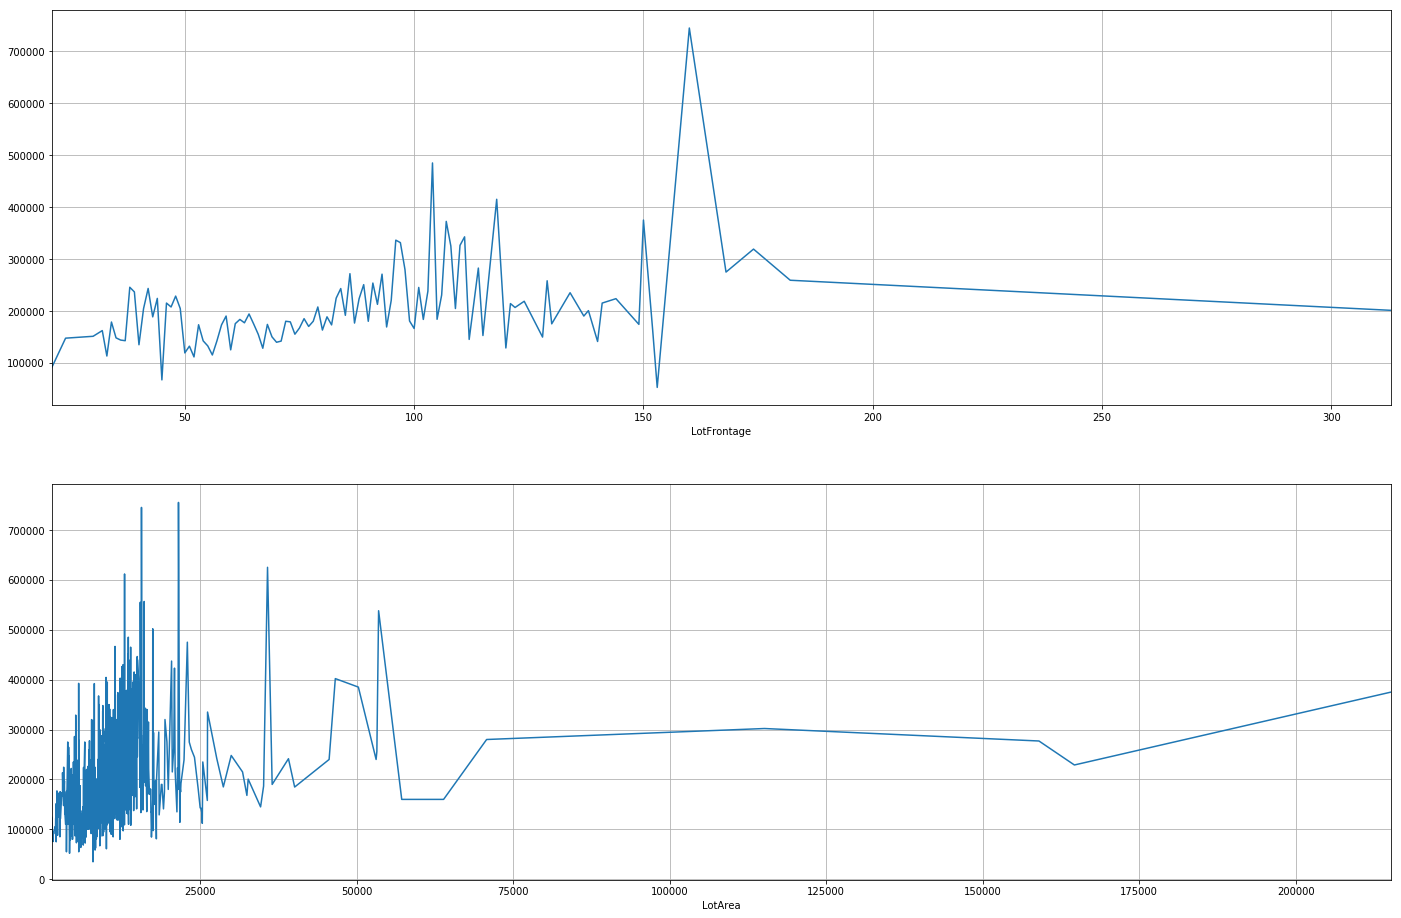

In [19]:
sns.set_context({"figure.figsize": (24, 16)})

plt.subplot2grid((2,1),(0,0))

# address_df.groupby('LotFrontage').agg(sum)['SalePrice'].plot(grid=True)
# address_df.groupby('LotFrontage').agg(np.mean)['SalePrice'].plot(grid=True)
address_df.groupby('LotFrontage').agg(np.median)['SalePrice'].plot(grid=True)
plt.subplot2grid((2,1),(1,0))

address_df.groupby('LotArea').agg(np.median)['SalePrice'].plot(grid=True)

### 地段特征-结论，位置特征可以先这么处理看看效果，后期有时间再挖掘：
- 1.这几个都是类别，直接做一下one-hot-encoding：'MSZoning', ,'Street', 'Neighborhood', 'Condition1', 'Condition2'
- 2.Alley数量太少，特征这么多，数据那么少，这种缺失值太多的，可以试试先去掉看看效果
- 3.'LotFrontage', 'LotArea'：加了中位数重新分析, 按分布规律分桶，
    - LotFrontage: (0,50) (50,100) (100,150) (150,180) >170
    - LotArea: (0,25000), (25000, 60000) >60000

### 4.材料类特征
- RoofStyle（屋顶类型/风格）: Type of roof
- RoofMatl（屋顶材料）: Roof material
- Exterior1st（表面，覆盖的东西）: Exterior covering on house
- Exterior2nd（表面，覆盖的东西）: Exterior covering on house (if more than one material)
- MasVnrType（石板类型）: Masonry veneer type
- MasVnrArea（石板/平方英尺）: Masonry veneer area in square feet
- ExterQual（表面-外体材料质量）: Exterior material quality
- ExterCond（外覆材料现状）: Present condition of the material on the exterior
- LotShape（一般形状？）: General shape of property
- LandContour（平坦度？）: Flatness of the property


In [9]:
material_df = train_df.loc[:, material_columns]
material_df.head()

,SalePrice,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,LotShape,LandContour
Id,,,,,,,,,,,
1,208500,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Reg,Lvl
2,181500,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Reg,Lvl
3,223500,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,IR1,Lvl
4,140000,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,IR1,Lvl
5,250000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,IR1,Lvl


In [10]:
material_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 11 columns):
SalePrice      1460 non-null int64
RoofStyle      1460 non-null object
RoofMatl       1460 non-null object
Exterior1st    1460 non-null object
Exterior2nd    1460 non-null object
MasVnrType     1452 non-null object
MasVnrArea     1452 non-null float64
ExterQual      1460 non-null object
ExterCond      1460 non-null object
LotShape       1460 non-null object
LandContour    1460 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 176.9+ KB


### 4-1 材料分析1
- 看看唯一一个数值型数据：MasVnrArea（石板/平方英尺）
- 大致上看，成正比吧，用的石板越多，越贵呗，很正常
- 特殊：0这个位置上，从最低到最高价都有，没用镶嵌石板也有贵的便宜的。。。可能因为不是外层的，不需要镶嵌吧
- 分桶处理好了，0单独一类（线性关系），其他一类（正比关系）

- 加了均值折线图，这个就明显了，这个货大于0的部分，开始还好，超出600波动就大了。。。得多分几个桶(0，10)，(10,600), (600,1150), >1150



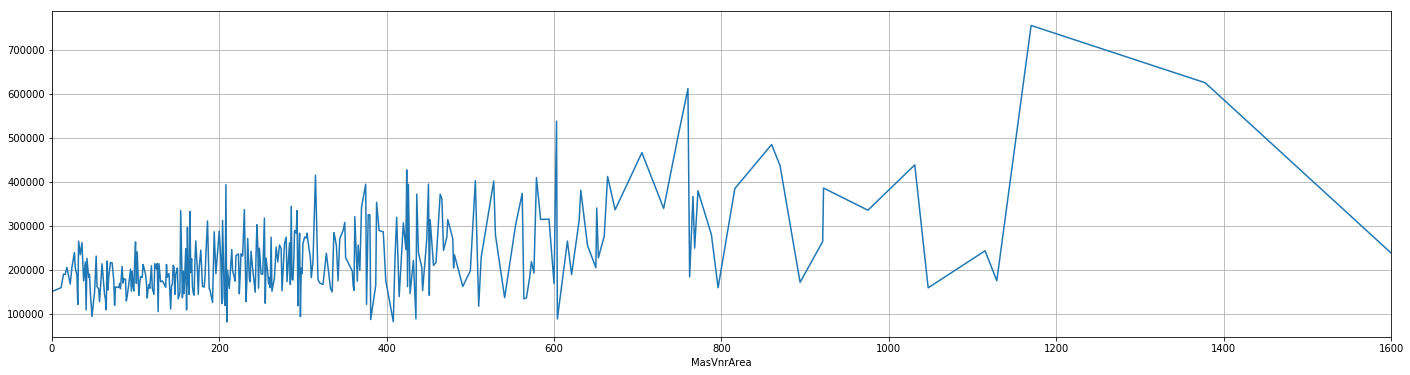

In [18]:
sns.set_context({"figure.figsize": (24, 6)})

material_df.groupby('MasVnrArea').agg(np.mean)['SalePrice'].plot(grid=True)

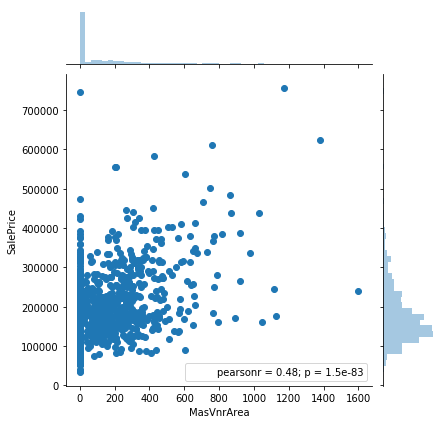

In [13]:
sns.set_context({"figure.figsize": (10, 6)})
sns.jointplot(x='MasVnrArea', y='SalePrice', data=material_df)


### 4-2.材料特征分析2
- 1.Roof这两个属性，材料和风格都会有一定影响，RoofMatl有个whsd什么的，可能比较高级，比其他的都影响房价，其他有4种材料固定的，完全不会影响，onehot分类时，这种东西直接去掉好了，反正特征数量肯定够
- 2.其他几种也类似，没有什么明显的，高级材料影响大，到时候考虑加点权重，完全无影响的。。直接去掉吧

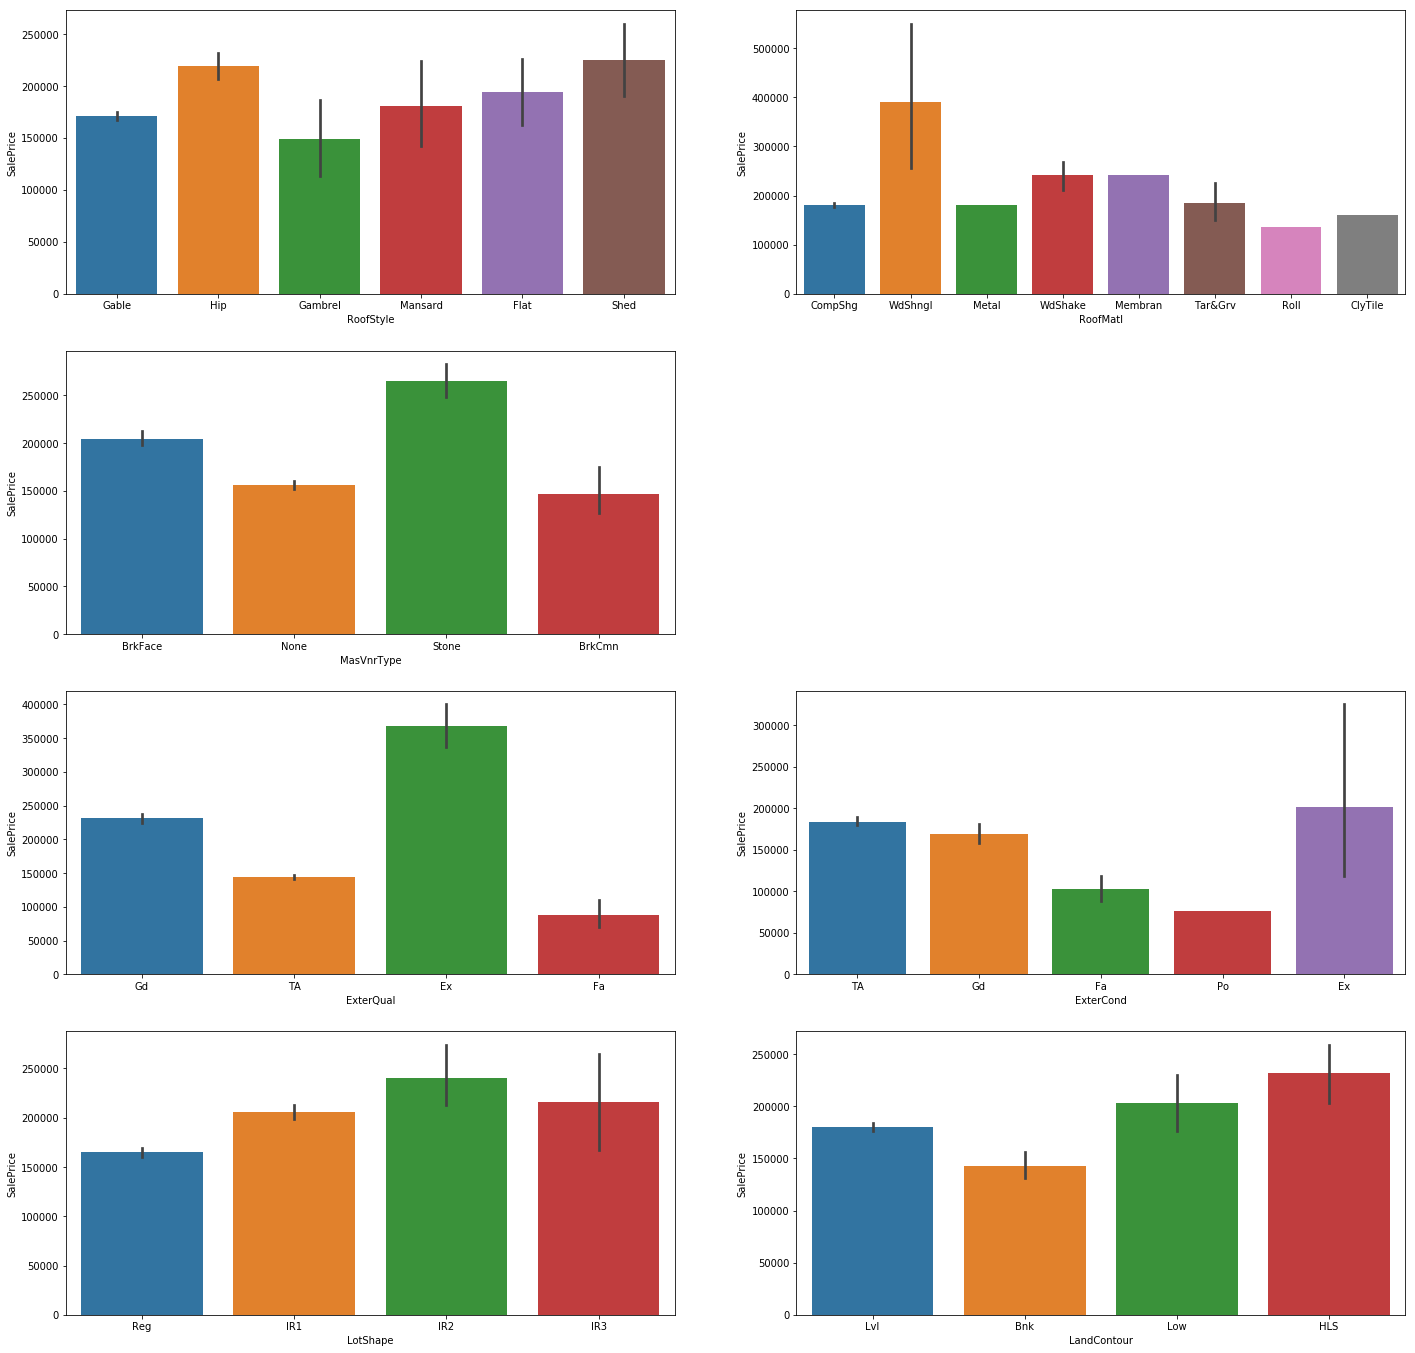

In [14]:
sns.set_context({"figure.figsize": (24, 24)})
#1st
plt.subplot2grid((4,2),(0,0))
sns.barplot(x='RoofStyle', y='SalePrice', data=material_df)

plt.subplot2grid((4,2),(0,1))
sns.barplot(x='RoofMatl', y='SalePrice', data=material_df)

#2nd
plt.subplot2grid((4,2),(1,0))
sns.barplot(x='MasVnrType', y='SalePrice', data=material_df)

#2nd

plt.subplot2grid((4,2),(2,0))
sns.barplot(x='ExterQual', y='SalePrice', data=material_df)

plt.subplot2grid((4,2),(2,1))
sns.barplot(x='ExterCond', y='SalePrice', data=material_df)

plt.subplot2grid((4,2),(3,0))
sns.barplot(x='LotShape', y='SalePrice', data=material_df)

plt.subplot2grid((4,2),(3,1))
sns.barplot(x='LandContour', y='SalePrice', data=material_df)

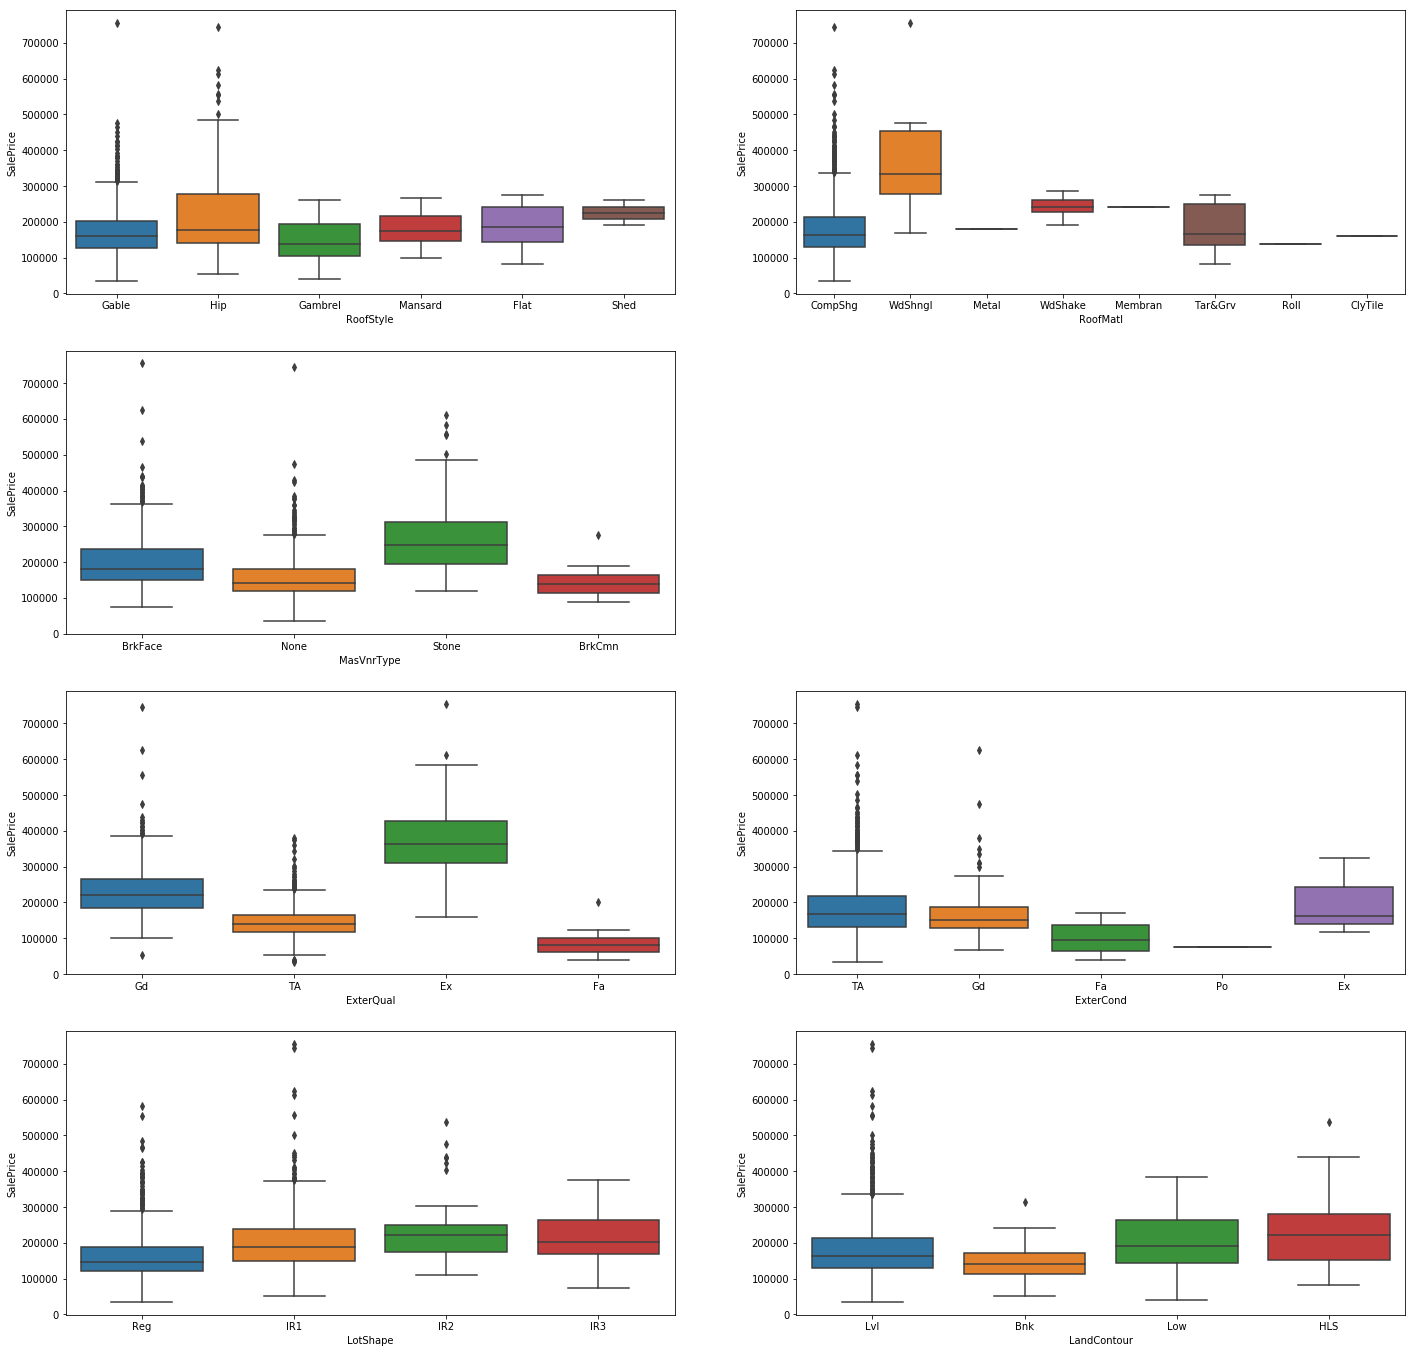

In [15]:
sns.set_context({"figure.figsize": (24, 24)})
#1st
plt.subplot2grid((4,2),(0,0))
sns.boxplot(x='RoofStyle', y='SalePrice', data=material_df)

plt.subplot2grid((4,2),(0,1))
sns.boxplot(x='RoofMatl', y='SalePrice', data=material_df)

#2nd
plt.subplot2grid((4,2),(1,0))
sns.boxplot(x='MasVnrType', y='SalePrice', data=material_df)

#2nd

plt.subplot2grid((4,2),(2,0))
sns.boxplot(x='ExterQual', y='SalePrice', data=material_df)

plt.subplot2grid((4,2),(2,1))
sns.boxplot(x='ExterCond', y='SalePrice', data=material_df)

plt.subplot2grid((4,2),(3,0))
sns.boxplot(x='LotShape', y='SalePrice', data=material_df)

plt.subplot2grid((4,2),(3,1))
sns.boxplot(x='LandContour', y='SalePrice', data=material_df)

4-3.材料特征分析3
- 1.和上面一样，固定值，完全无影响的，onehot后准备去掉
- 2.波动较大的，还有离群点，噪声比较大，可能对结构有影响，到时候考虑去噪声试试

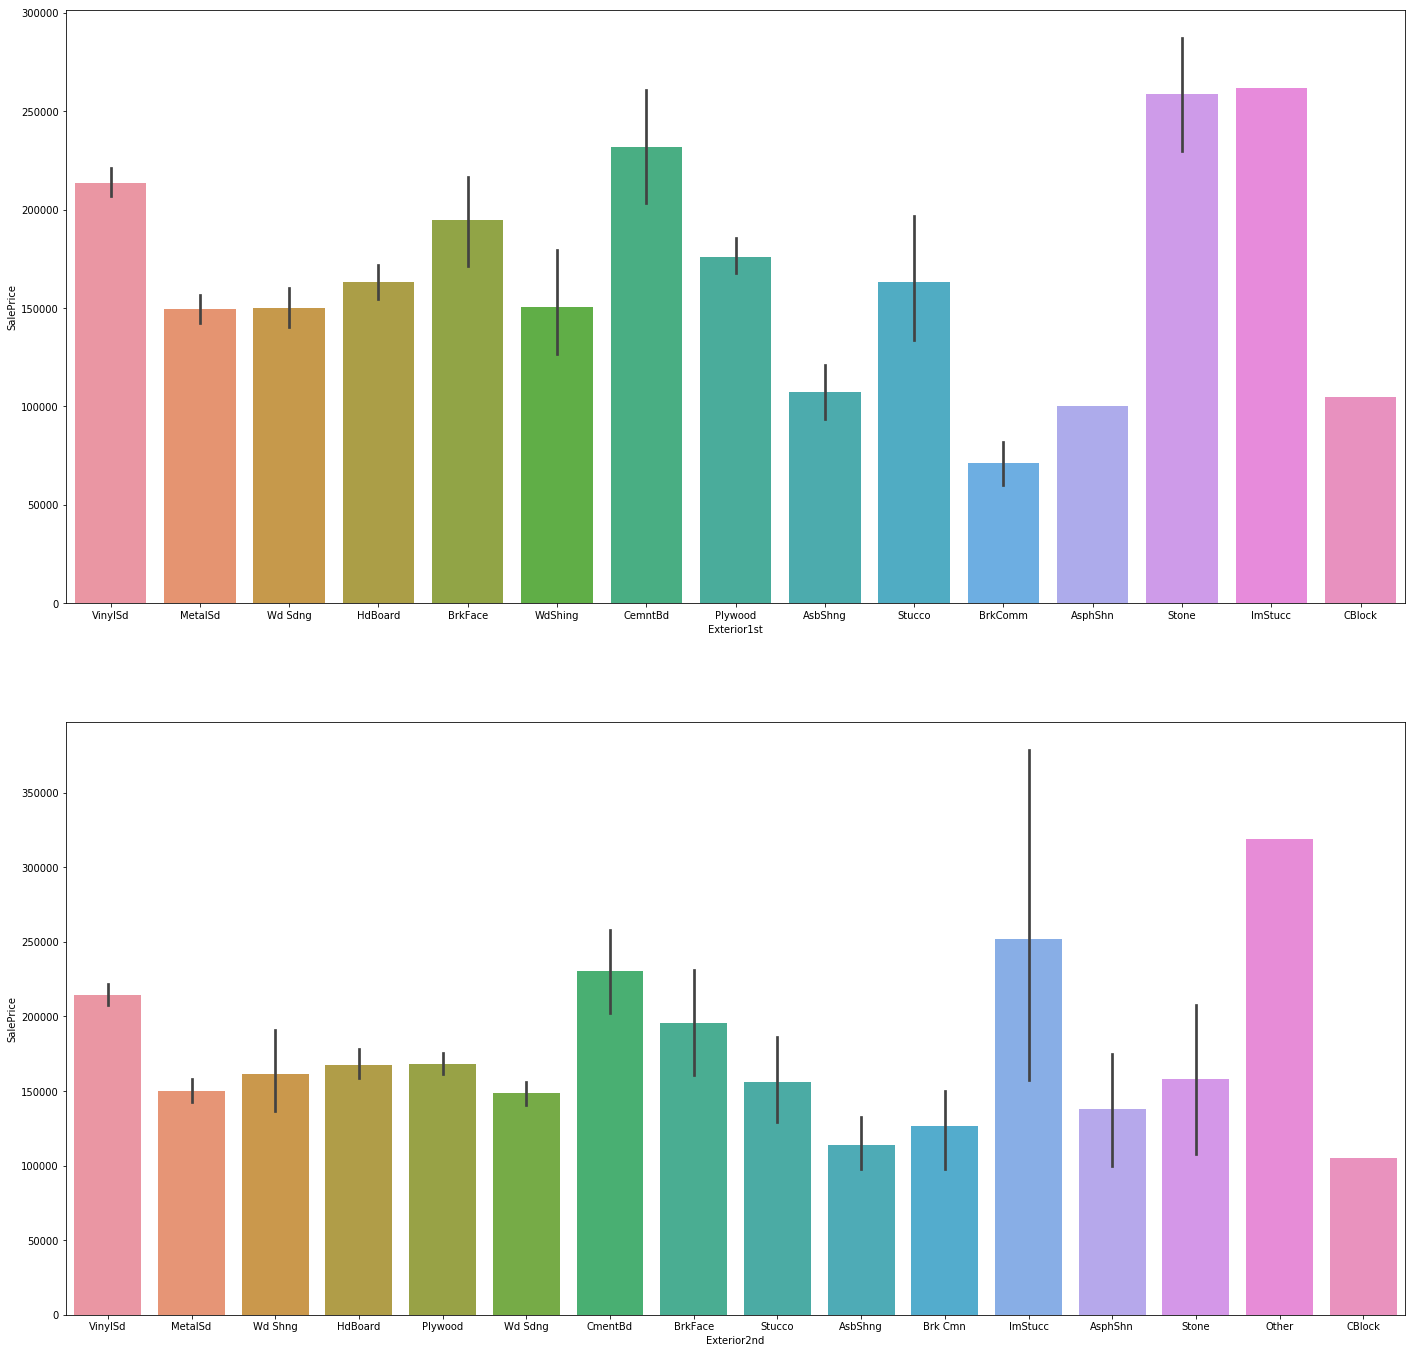

In [16]:
plt.subplot2grid((2,1),(0,0))
sns.barplot(x='Exterior1st', y='SalePrice', data=material_df)

#2nd
plt.subplot2grid((2,1),(1,0))
sns.barplot(x='Exterior2nd', y='SalePrice', data=material_df)

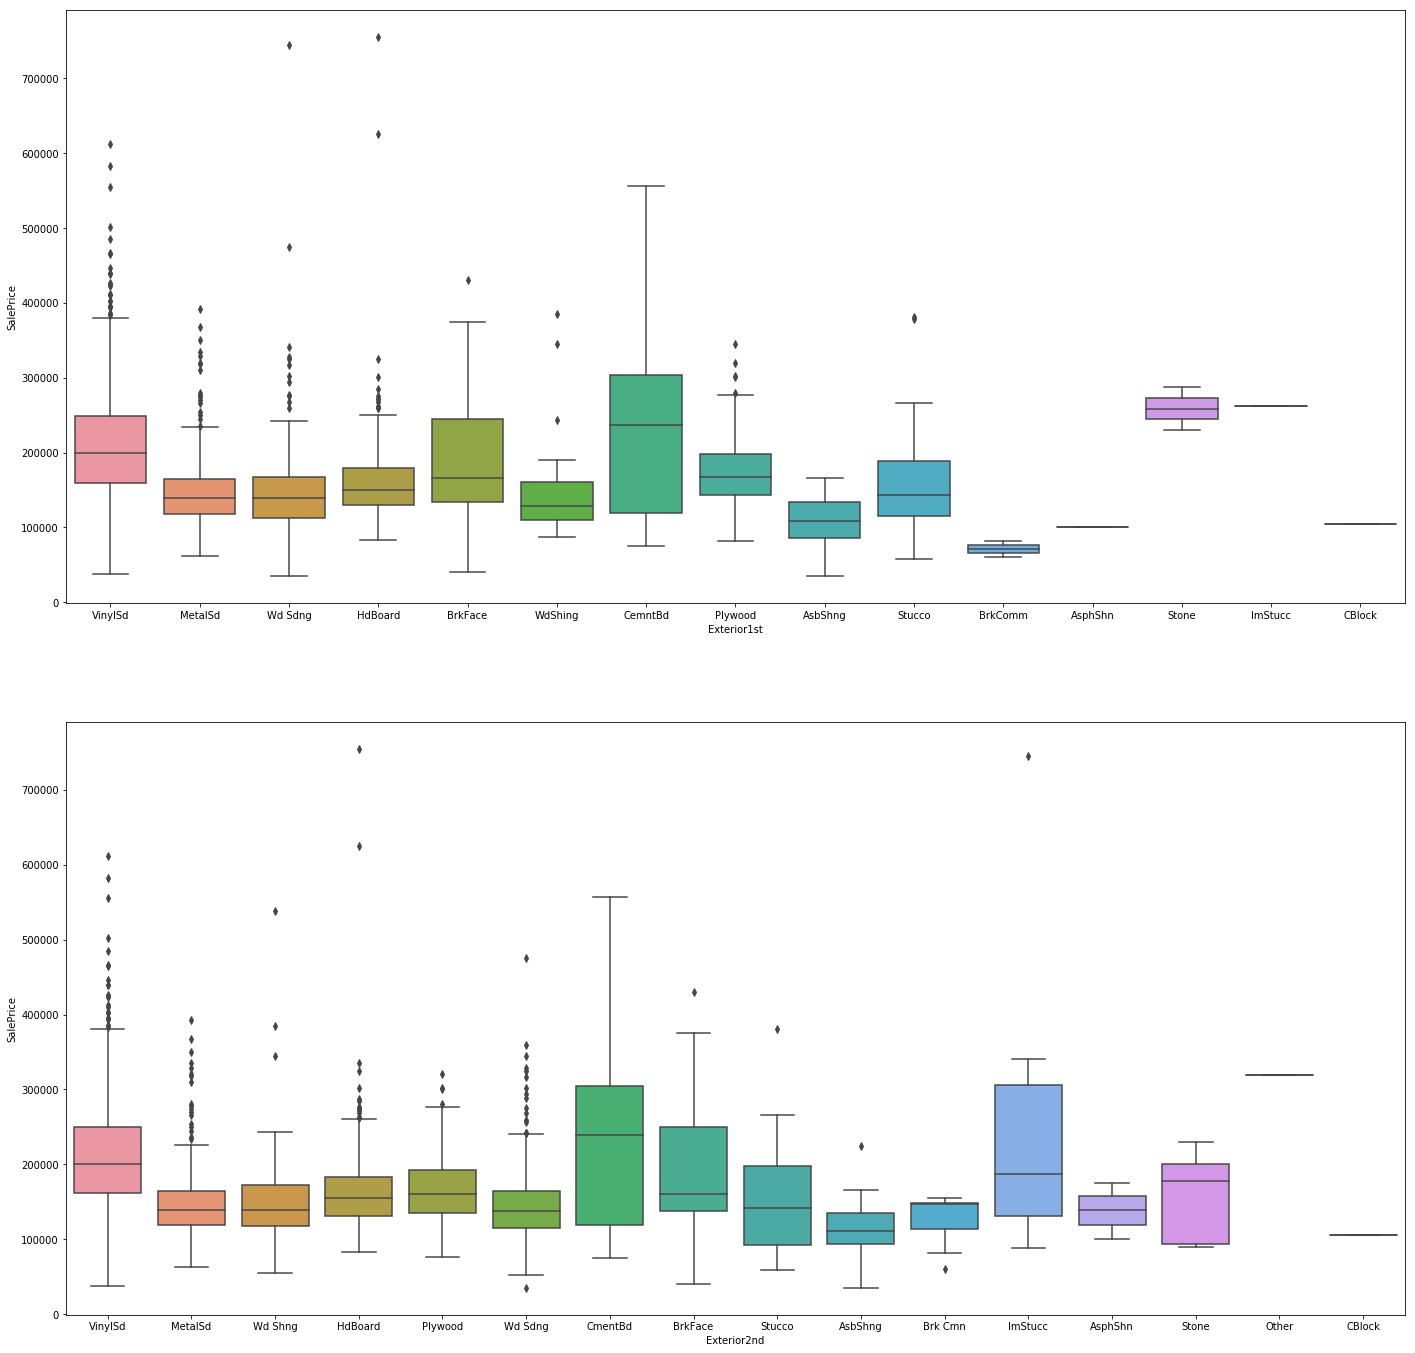

In [17]:
plt.subplot2grid((2,1),(0,0))
sns.boxplot(x='Exterior1st', y='SalePrice', data=material_df)

#2nd
plt.subplot2grid((2,1),(1,0))
sns.boxplot(x='Exterior2nd', y='SalePrice', data=material_df)

# 1.地段特征-结论
- 1.这几个都是类别，直接做一下one-hot-encoding：'MSZoning', ,'Street', 'Neighborhood', 'Condition1', 'Condition2'
- 2.Alley数量太少，特征这么多，数据那么少，这种缺失值太多的，可以试试先去掉看看效果
- 3.'LotFrontage', 'LotArea'：加了中位数重新分析, 按分布规律分桶，
    - LotFrontage: (0,50) (50,100) (100,150) >150都填充150
    - LotArea: 0,25000 >=25000


# 2. 材料维度-结论
- 2.Roof这两个属性，材料和风格都会有一定影响，RoofMatl有个whsd什么的，可能比较高级，比其他的都影响房价，其他有4种属性固定
- 3.高级材料影响大，到时候考虑加点权重，需要考虑噪声点的处理


- 需要onehot处理这些类别属性：'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','LotShape','LandContour'
- MasVnrArea（石板/平方英尺），分桶，多分几个桶==0，!=0
